In [1]:
%%html
<style>
table {float:left}
</style>

In [3]:
# my python files
import src.analytics as tics
import src.plotting_functions as pltfuncs
import src.transforms as trans
import src.hyp_test as hyp
import src.run_on_classifier as run

# Imports
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from scipy.stats import kendalltau
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge
from sklearn.pipeline import Pipeline
from basis_expansions.basis_expansions import (
    Polynomial, LinearSpline, NaturalCubicSpline)
from regression_tools.dftransformers import (
    ColumnSelector, Identity, FeatureUnion, MapFeature, Intercept)
from regression_tools.plotting_tools import (
    plot_univariate_smooth,
    bootstrap_train,
    display_coef,
    plot_bootstrap_coefs,
    plot_partial_depenence,
    plot_partial_dependences,
    predicteds_vs_actuals)
from sklearn.metrics import roc_curve, auc

%matplotlib inline

In [4]:
# On OSX requires brew install coreutils, using gshuf instead of shuf
sample_name = 'data/sample_random_subset.csv'
tics.create_random_samples('data/kddcup.data', 700000, sample_name)

df = trans.read_data(sample_name)

### Testing each feature independently
- gathering confusion matrices


In [5]:
# Dropping Highly Correlated Features
df = trans.drop_high_correlations(df)
trans.drop_zeros_columns(df)

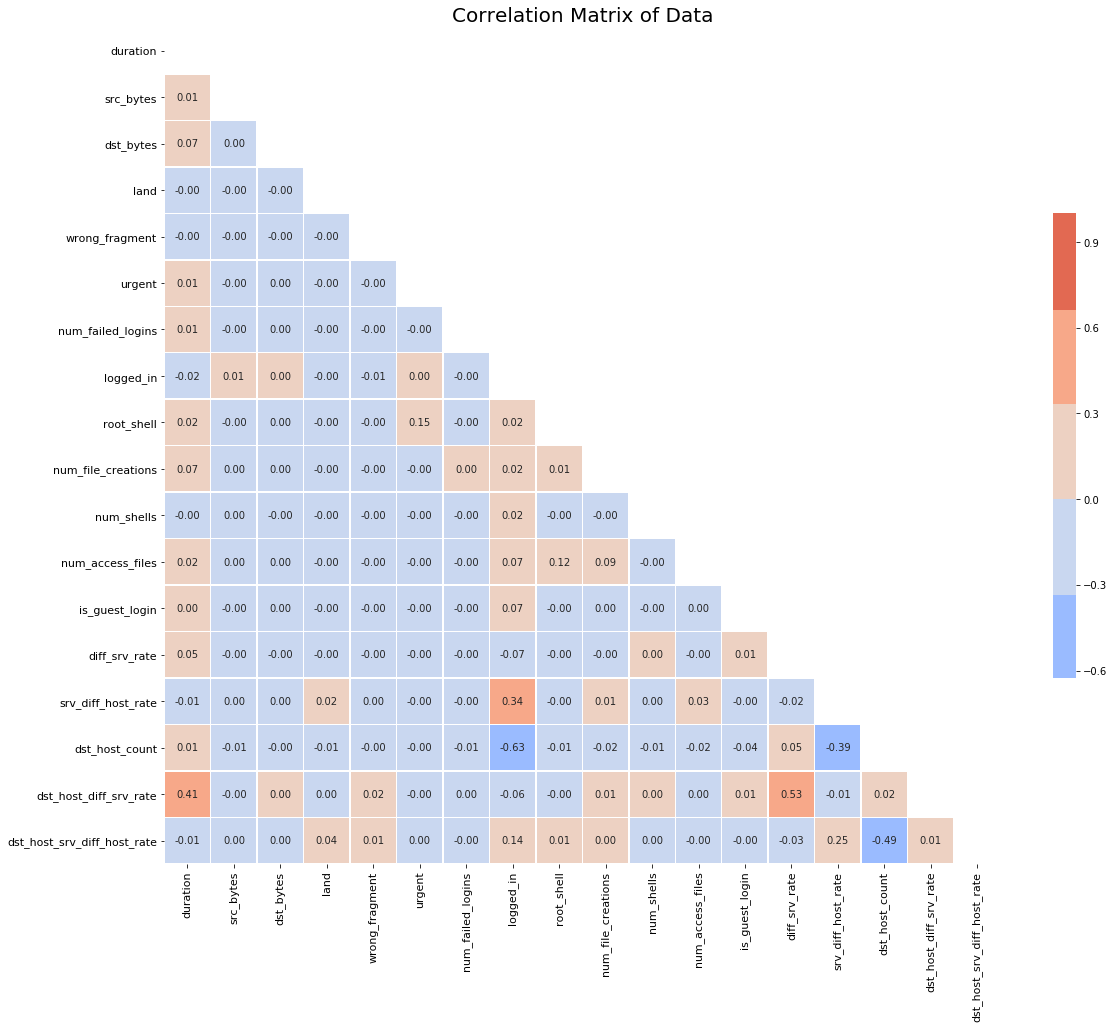

In [7]:
title = 'Correlation Matrix of Data'
pltfuncs.corr_heat(df, title )

In [8]:
# # Uncomment to get a list of objects
# df_types = tics.get_dict_of_dtypes(df)
# objects = df_dtypes['object']
# objects
column_list = list(df.columns)
# column_list






#--------------------------------------------#
     Running classifier on ['duration']
#--------------------------------------------#


Modified Y to balance 1s and 0s
1    145460
0    145460
Name: attack_category, dtype: int64


/Users/tbot/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)




True Positives: 29048
True Negatives: 2298
False Positives: 26838
True Negatives: 0

Accuracy: 0.5387391722810395
Classification_error: 0.46126082771896054
Recall: 1.0
Precision: 0.5197723938016677
False Negative Rate: 0.0

confusion matrix
[[ 2298 26838]
 [    0 29048]]




#--------------------------------------------#
     Running classifier on ['protocol_type']
#--------------------------------------------#


Modified Y to balance 1s and 0s
1    145460
0    145460
Name: attack_category, dtype: int64


True Positives: 21091
True Negatives: 28421
False Positives: 747
True Negatives: 7925

Accuracy: 0.8509555891654063
Classification_error: 0.14904441083459372
Recall: 0.7268748276812793
Precision: 0.9657935708398205
False Negative Rate: 0.2731251723187207

confusion matrix
[[28421   747]
 [ 7925 21091]]




#--------------------------------------------#
     Running classifier on ['service']
#--------------------------------------------#


Modified Y to balance 1s and 0s
1    145460




True Positives: 20890
True Negatives: 1327
False Positives: 27948
True Negatives: 8019

Accuracy: 0.38184036848618175
Classification_error: 0.6181596315138183
Recall: 0.7226123352589159
Precision: 0.42774069372210166
False Negative Rate: 0.2773876647410841

confusion matrix
[[ 1327 27948]
 [ 8019 20890]]




#--------------------------------------------#
     Running classifier on ['srv_diff_host_rate']
#--------------------------------------------#


Modified Y to balance 1s and 0s
1    145460
0    145460
Name: attack_category, dtype: int64


True Positives: 29375
True Negatives: 9612
False Positives: 19184
True Negatives: 13

Accuracy: 0.6700639351024337
Classification_error: 0.32993606489756633
Recall: 0.9995576425752007
Precision: 0.6049342037521366
False Negative Rate: 0.00044235742479923777

confusion matrix
[[ 9612 19184]
 [   13 29375]]




#--------------------------------------------#
     Running classifier on ['dst_host_count']
#-------------------------------------------

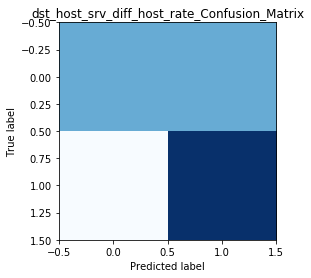

In [9]:
columns=['col', 'TN' ,'FP' ,
         'FN','TP','accuracy',
         'recall' ,'specificity', 
         'false_positive_rate', 'false_negative_rate',
         'precision', 
         ]

populate_conf_mat = {'col':[], 'TN':[], 'FP':[], 
                     'FN':[], 'TP':[], 'accuracy':[], 
                     'recall':[], 'specificity':[], 
                     'false_positive_rate':[],'false_negative_rate':[], 
                     'precision':[]
                    }

for col in column_list:
    # We don't want to run on this value
    if col == 'label':
        continue
        
    keep = [col]

    # logistic regression object
    classifier = LogisticRegression(penalty='l1')

    TN, FP, FN, TP, accuracy, recall, specificity, false_positive_rate, false_negative_rate, precision = run.run_classifier(df, keep, classifier)
    
    
    
    populate_conf_mat['col'].append(col)
    populate_conf_mat['TN'].append(TN)
    populate_conf_mat['FP'].append(FP)
    populate_conf_mat['FN'].append(FN)
    populate_conf_mat['TP'].append(TP)
    populate_conf_mat['accuracy'].append(accuracy)
    populate_conf_mat['recall'].append(recall)
    populate_conf_mat['specificity'].append(specificity)
    populate_conf_mat['false_positive_rate'].append(false_positive_rate)
    populate_conf_mat['false_negative_rate'].append(false_positive_rate)
    populate_conf_mat['precision'].append(precision)


conf_matrix_vals = pd.DataFrame(columns=columns)

# df = trans.drop_all_except(df, keep)



In [10]:
# title = 'Correlation Matrix of data after Dropping Correlated'
# pltfuncs.corr_heat(df, title)

# df.columns
# populate_conf_mat

In [11]:
conf_mat_df = pd.DataFrame(data=populate_conf_mat, columns=columns)

# df.columns
# g = sns.pairplot(df)
conf_mat_df.info()

# pltfuncs.plot_confusion_matrix(conf_mat)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 11 columns):
col                    21 non-null object
TN                     21 non-null int64
FP                     21 non-null int64
FN                     21 non-null int64
TP                     21 non-null int64
accuracy               21 non-null float64
recall                 21 non-null float64
specificity            21 non-null float64
false_positive_rate    21 non-null float64
false_negative_rate    21 non-null float64
precision              21 non-null float64
dtypes: float64(6), int64(4), object(1)
memory usage: 1.9+ KB


In [12]:

# plt.barplot(conf_mat_df)
# conf_mat_df[''][conf_mat_df['col'] == 'duration'], title='Feature: Duration Confusion matrix', cmap=plt.cm.Blues)
conf_mat_df.head(30)

,col,TN,FP,FN,TP,accuracy,recall,specificity,false_positive_rate,false_negative_rate,precision
0,duration,2298,26838,0,29048,0.538739,1.000000,0.078871,0.921129,0.921129,0.519772
1,protocol_type,28421,747,7925,21091,0.850956,0.726875,0.974390,0.025610,0.025610,0.965794
2,service,26338,2609,99,29138,0.953458,0.996614,0.909870,0.090130,0.090130,0.917819
3,flag,28757,77,22827,6523,0.606352,0.222249,0.997330,0.002670,0.002670,0.988333
4,src_bytes,28999,0,29185,0,0.498402,0.000000,1.000000,0.000000,0.000000,0.000000
5,dst_bytes,9887,19065,16,29216,0.672058,0.999453,0.341496,0.658504,0.658504,0.605124
6,land,0,29103,0,29081,0.499811,1.000000,0.000000,1.000000,1.000000,0.499811
7,wrong_fragment,0,29206,0,28978,0.498041,1.000000,0.000000,1.000000,1.000000,0.498041
8,urgent,29033,0,29151,0,0.498986,0.000000,1.000000,0.000000,0.000000,0.000000
9,num_failed_logins,1,29141,0,29042,0.499158,1.000000,0.000034,0.999966,0.999966,0.499149


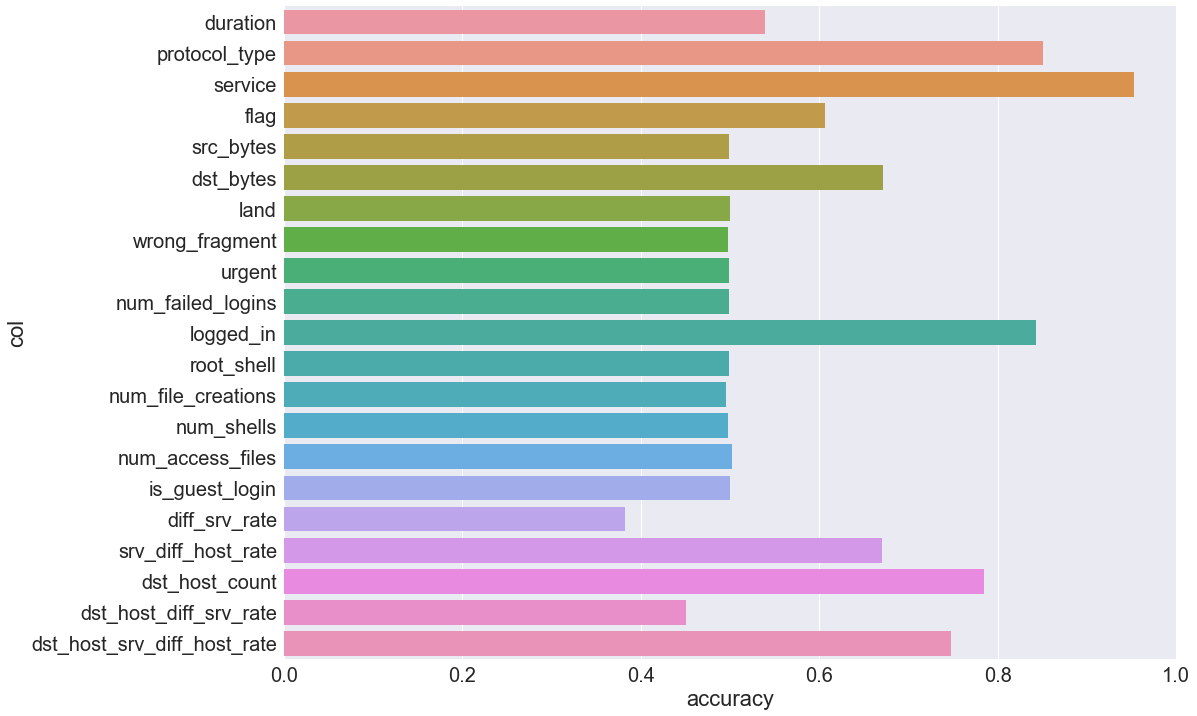

In [14]:

dims = (16, 12)
fig, ax = plt.subplots(figsize=dims)
ax = sns.barplot(x="accuracy", y="col", data=conf_mat_df)
sns.set_style("ticks")
sns.set()
sns.set(font_scale=2) 

Note that the feature with the single highest accuracy value using logistic regression is service.

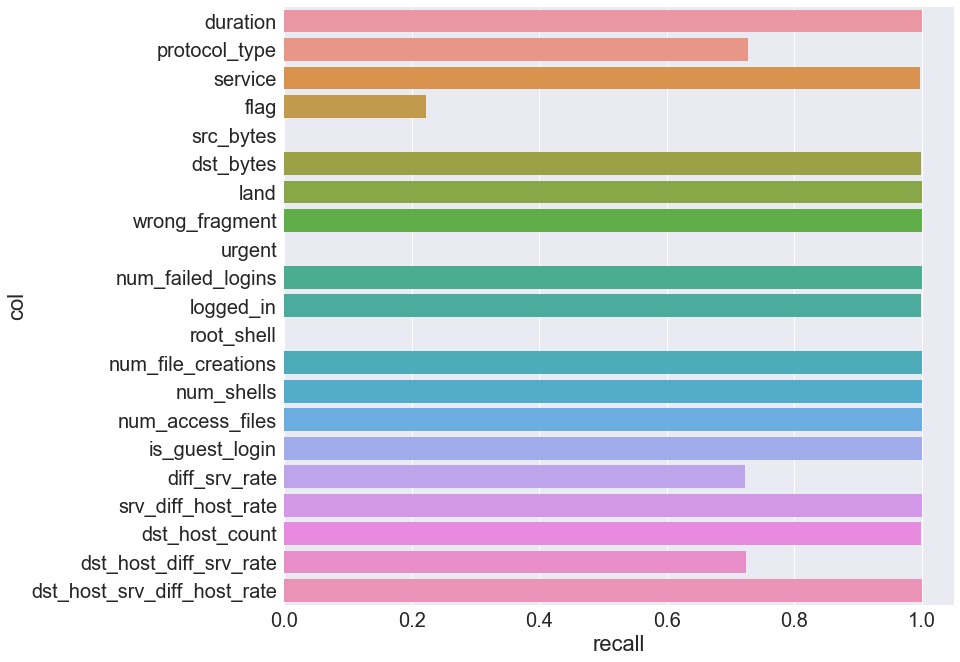

In [15]:
dims = (12, 11)
fig, ax = plt.subplots(figsize=dims)
ax = sns.barplot(x="recall", y="col", data=conf_mat_df)
sns.set_style("ticks")


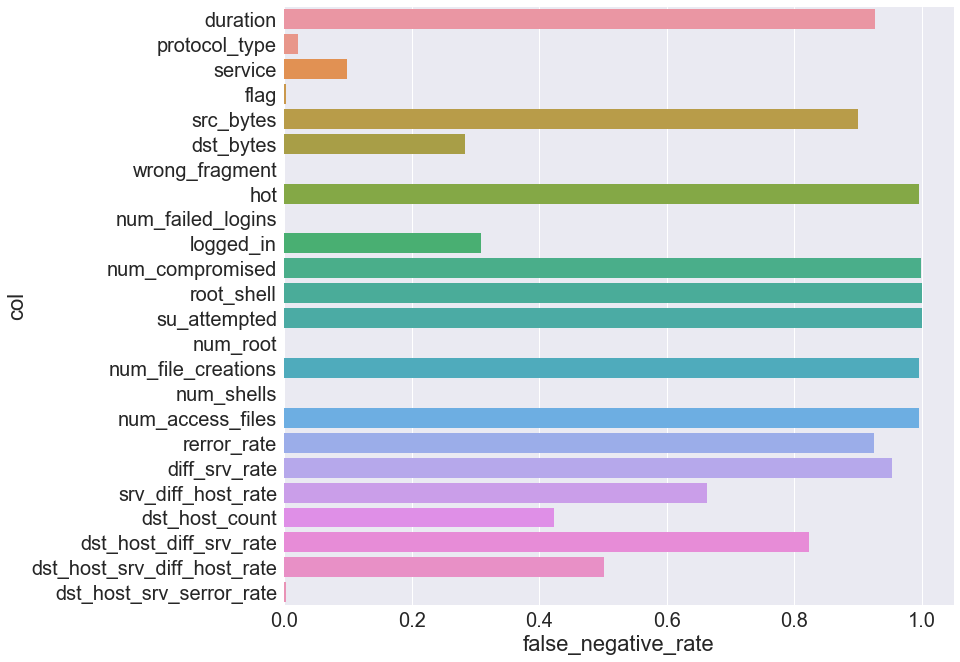

In [944]:
dims = (12, 11)
fig, ax = plt.subplots(figsize=dims)
ax = sns.barplot(x="false_negative_rate", y="col", data=conf_mat_df)
sns.set_style("ticks") 

## Run classifier on test data (has new features)

## make series of pairwise plots

## plug in knn